In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import json
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

## Read dataset & convert dataset into json to csv format

In [2]:
data=pd.read_json('complaints-2021-05-14_08_16_.json')
data.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0,"{'tags': None, 'zip_code': '10473', 'complaint..."


In [ ]:

with open('complaints-2021-05-14_08_16_.json') as f:
    data = json.load(f)

source_data = [item["_source"] for item in data]
df = pd.DataFrame(source_data)

print(df.head())

            tags zip_code complaint_id                               issue  \
0           None    90301      3211475   Attempts to collect debt not owed   
1  Servicemember    319XX      3229299     Written notification about debt   
2           None    77069      3199379  Other features, terms, or problems   
3           None    48066      2673060      Trouble during payment process   
4           None    10473      3203545                    Fees or interest   

               date_received state consumer_disputed  \
0  2019-04-13T12:00:00-05:00    CA               N/A   
1  2019-05-01T12:00:00-05:00    GA               N/A   
2  2019-04-02T12:00:00-05:00    TX               N/A   
3  2017-09-13T12:00:00-05:00    MI               N/A   
4  2019-04-05T12:00:00-05:00    NY               N/A   

                       product         company_response               company  \
0              Debt collection  Closed with explanation  JPMORGAN CHASE & CO.   
1              Debt collection  

In [ ]:

df['date_received'] = pd.to_datetime(df['date_received'], errors='coerce')

In [5]:
df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13 12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01 12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02 12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13 12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05 12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.show()

<Figure size 1200x600 with 0 Axes>

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_4660\3062593578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='product', data=df, order=df['product'].value_counts().index, palette="viridis")


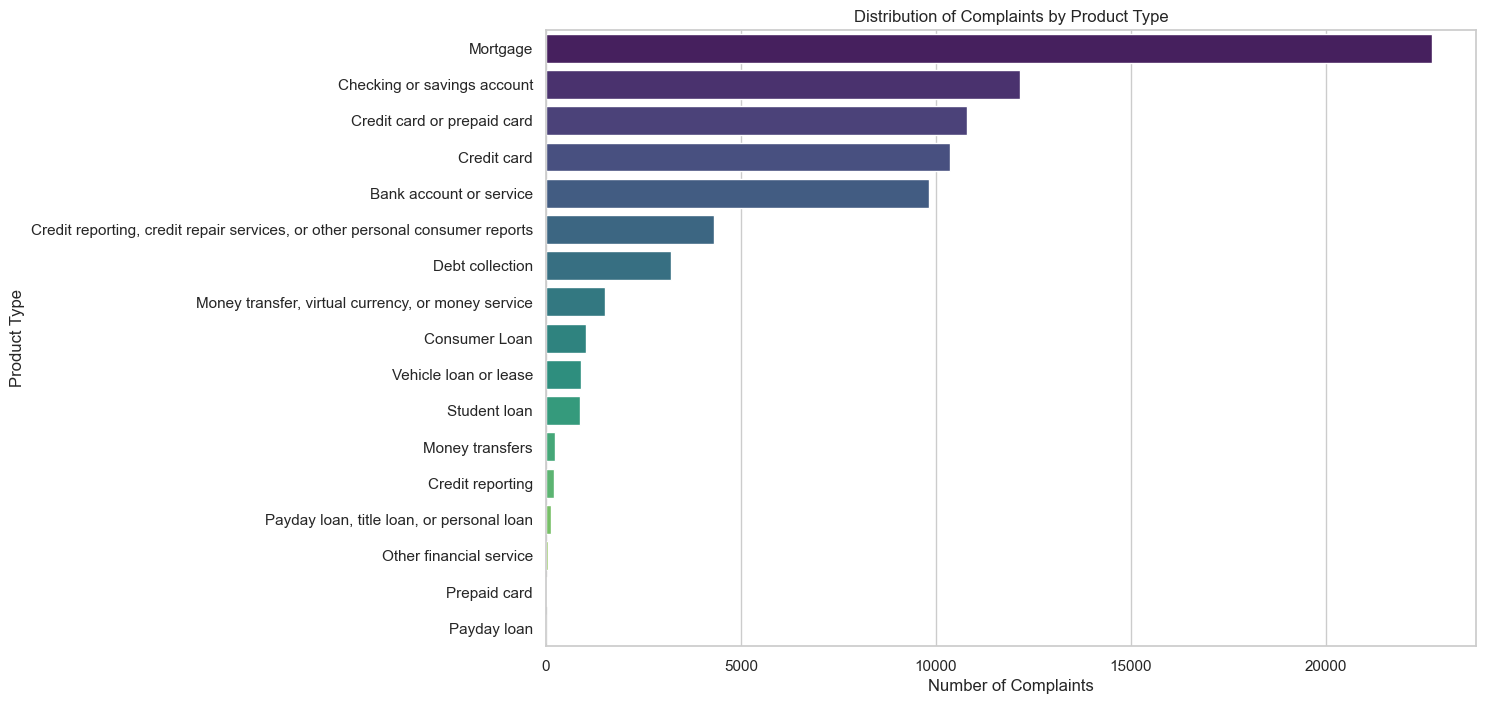

In [ ]:

plt.figure(figsize=(12, 8))
sns.countplot(y='product', data=df, order=df['product'].value_counts().index, palette="viridis")
plt.title("Distribution of Complaints by Product Type")
plt.xlabel("Number of Complaints")
plt.ylabel("Product Type")
plt.show()

- The chart displays the distribution of consumer complaints by product type.
- Mortgages, checking/savings accounts, and credit cards have the highest complaint volumes.
- Other significant areas include bank accounts, credit reporting, and debt collection.
- Highlights key areas in financial services where consumers commonly face issues.

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_4660\2127160707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='issue', data=df, order=df['issue'].value_counts().index, palette="viridis")


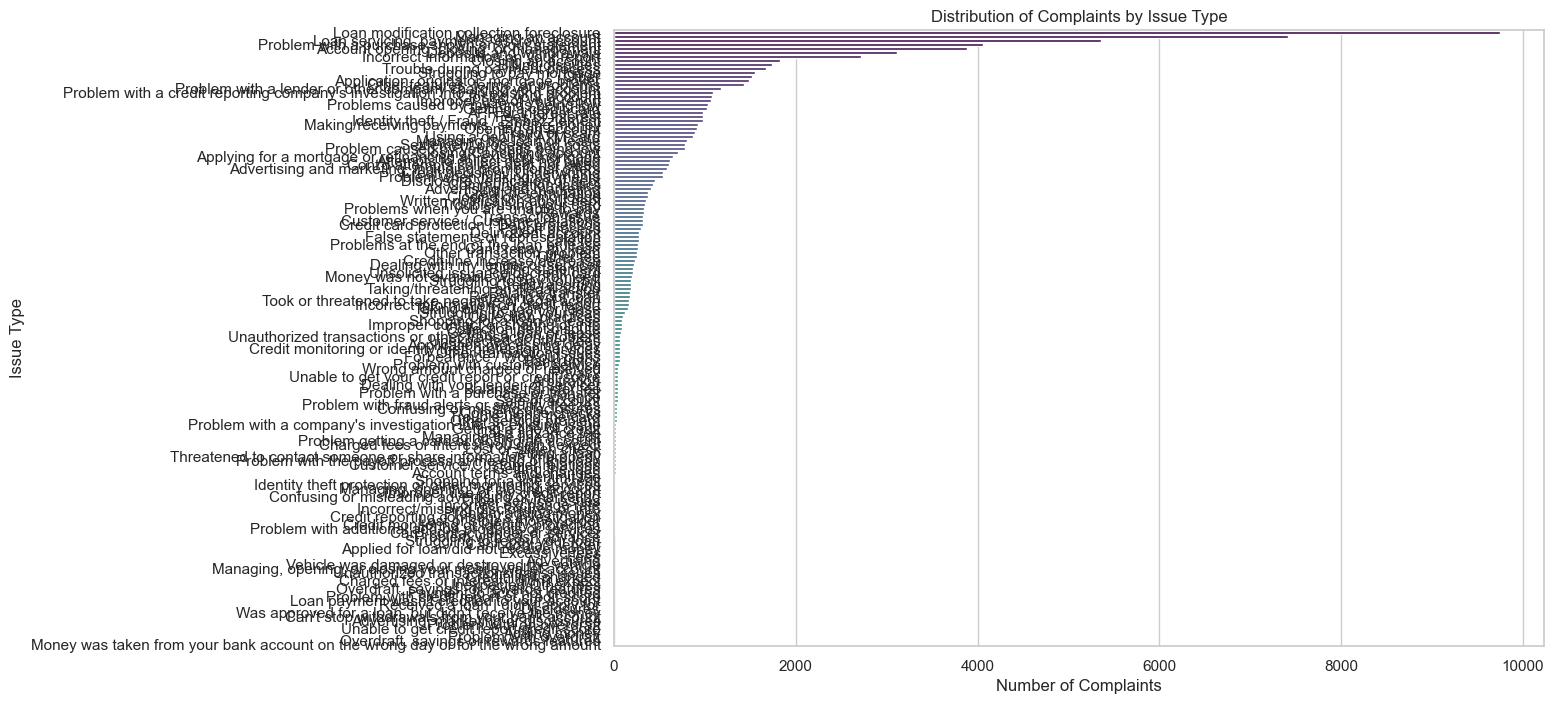

In [ ]:

plt.figure(figsize=(12, 8))
sns.countplot(y='issue', data=df, order=df['issue'].value_counts().index, palette="viridis")
plt.title("Distribution of Complaints by Issue Type")
plt.xlabel("Number of Complaints")
plt.ylabel("Issue Type")
plt.show()

- This chart illustrates the distribution of consumer complaints by specific issue types, providing a detailed view of common problems encountered in financial services.
- "Loan modification, collection, and foreclosure" is the leading complaint, indicating frequent challenges in loan servicing and management.
- Other significant issues include "problems with a lender or servicer" and "incorrect information on reports," highlighting concerns with accuracy and transparency in financial interactions.
- The diversity of issues, from unauthorized transactions to problems with account management, showcases the various pain points consumers experience, suggesting areas for potential improvement in financial service practices and customer support.

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_4660\780347438.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date_received').resample('M').size().plot(marker='o', linestyle='-')


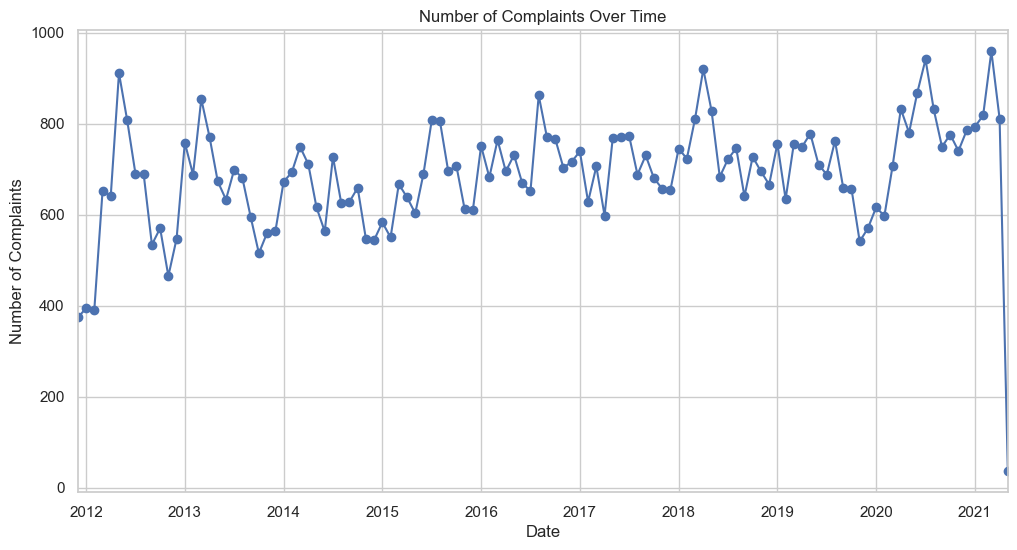

In [ ]:

plt.figure(figsize=(12, 6))
df.set_index('date_received').resample('M').size().plot(marker='o', linestyle='-')
plt.title("Number of Complaints Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.show()

- The line chart shows the number of complaints filed over time, from 2012 to 2021.
- There's a noticeable fluctuation in complaints, with peaks around 2012, 2013, and occasional spikes in later years.
- After a period of relative stability, complaints appear to rise again from 2019, peaking in 2020, possibly reflecting increased financial challenges or reporting.
- The sharp drop in 2021 may indicate incomplete data for that year rather than an actual decrease in complaints.
- This trend provides insights into consumer sentiment and potential external factors affecting financial complaints over time.

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_4660\3834880477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='company_response', data=df, order=df['company_response'].value_counts().index, palette="viridis")


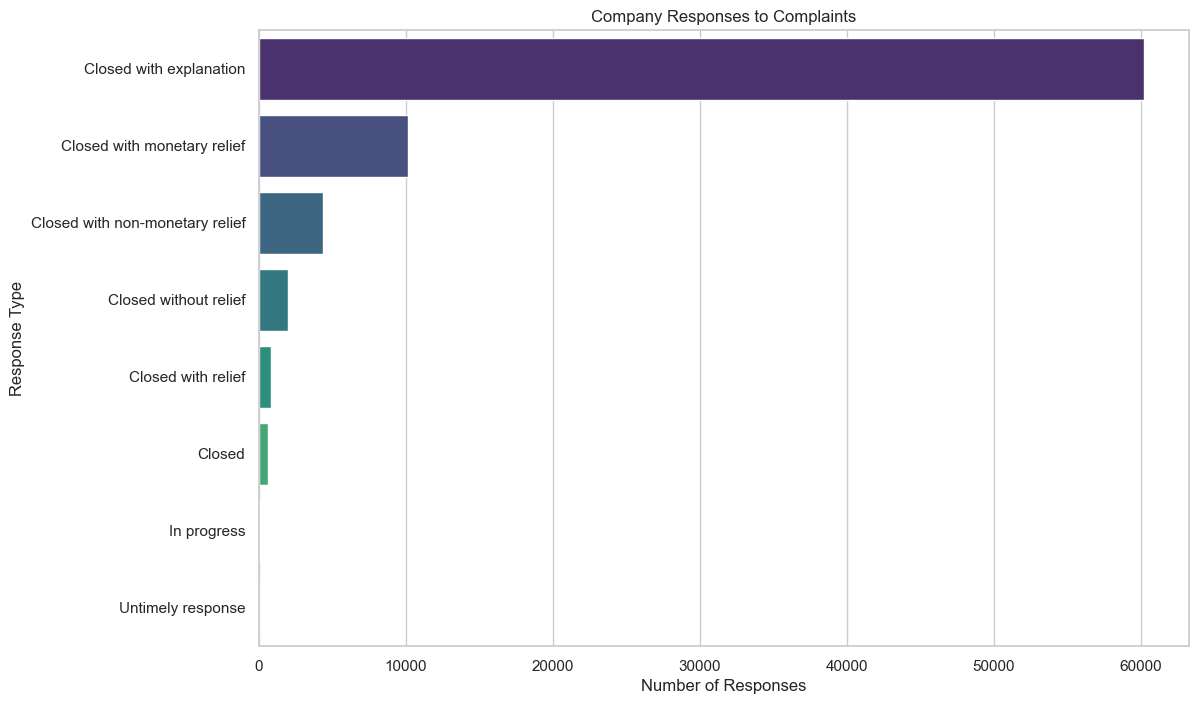

In [ ]:

plt.figure(figsize=(12, 8))
sns.countplot(y='company_response', data=df, order=df['company_response'].value_counts().index, palette="viridis")
plt.title("Company Responses to Complaints")
plt.xlabel("Number of Responses")
plt.ylabel("Response Type")
plt.show()


- The chart shows company responses to consumer complaints.
- Most complaints were "Closed with explanation," indicating explanations were the main resolution.
- Some complaints received "monetary" or "non-monetary relief," showing companies provided compensation in certain cases.
- Less common responses include "Closed without relief" and "Closed with relief."
- Few cases are marked "In progress" or "Untimely response," suggesting most complaints were handled on time.

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_4660\517404446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='state', data=df, order=df['state'].value_counts().index, palette="viridis")


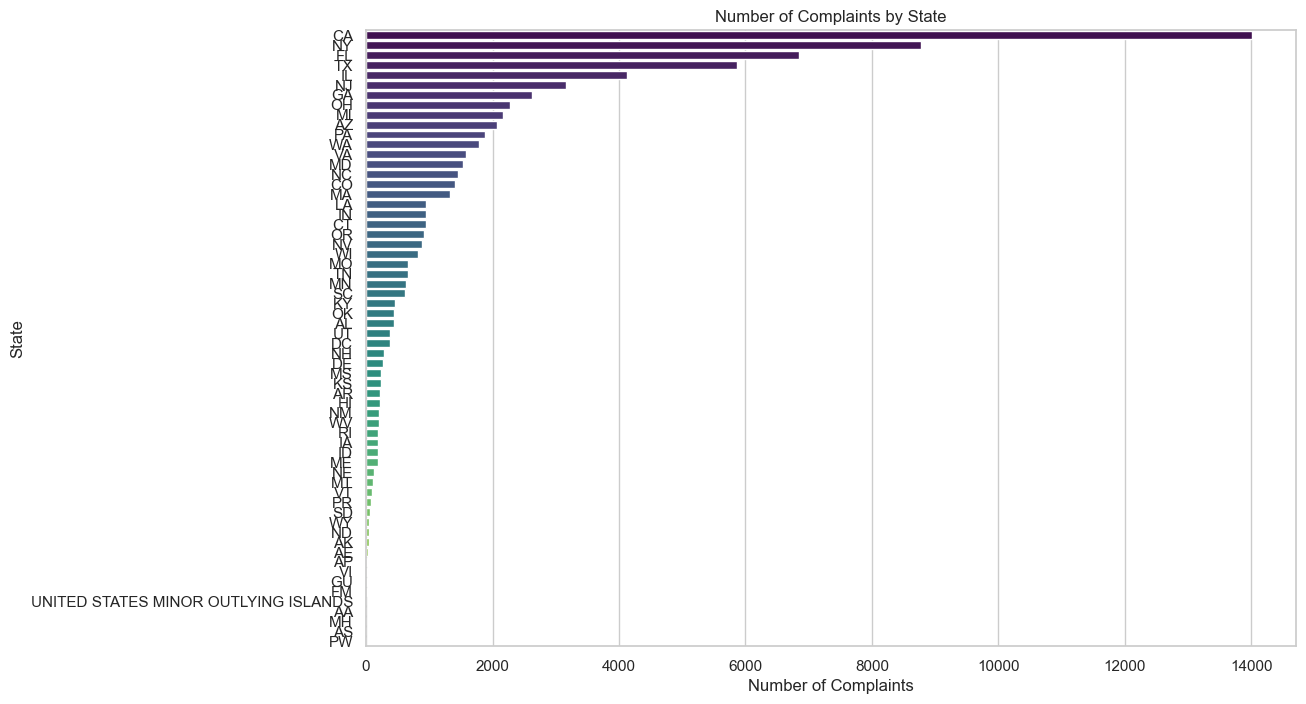

In [ ]:

plt.figure(figsize=(12, 8))
sns.countplot(y='state', data=df, order=df['state'].value_counts().index, palette="viridis")
plt.title("Number of Complaints by State")
plt.xlabel("Number of Complaints")
plt.ylabel("State")
plt.show()

- The chart shows the number of complaints by state.
- California, Florida, Texas, and New York have the highest complaint counts, indicating high consumer activity or financial concerns in these states.
- Mid-range states include Illinois, Georgia, and Pennsylvania.
- Smaller states and territories have fewer complaints, which may reflect population size or lower reporting rates.

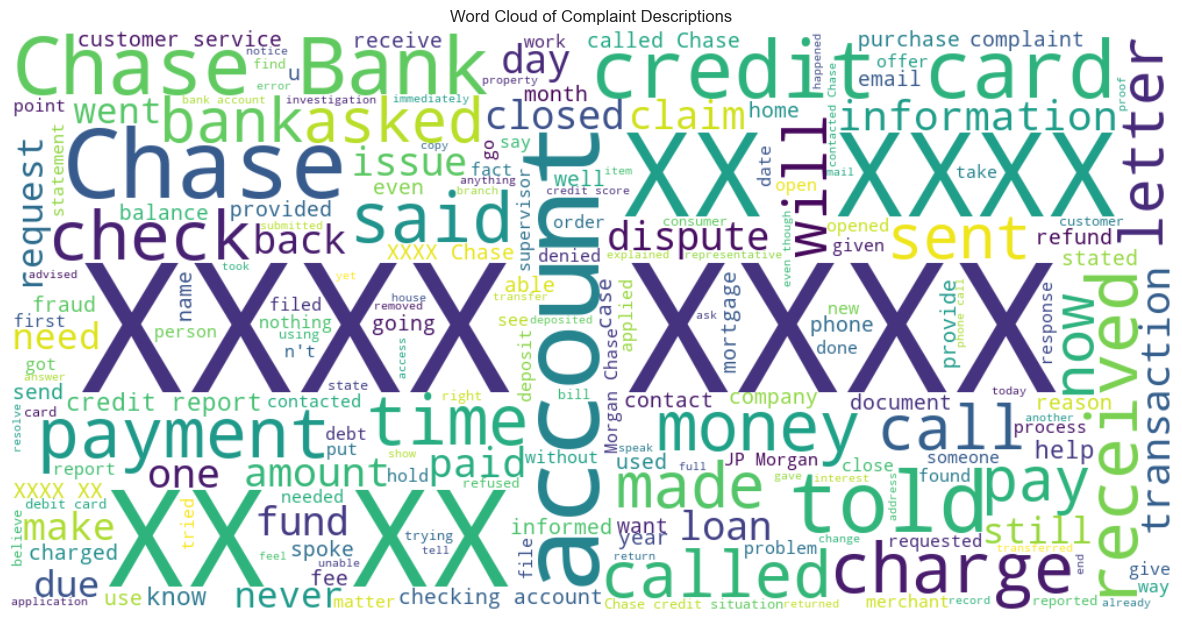

In [ ]:

text = ' '.join(df['complaint_what_happened'].dropna().values)

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Complaint Descriptions")
plt.show()


Lets rename the necessary columns for easy understanding

In [13]:
df.rename(columns={'product':'category','complaint_what_happened':'complaint_description','sub_product':'sub_category'},inplace=True)
df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,category,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_category,timely,complaint_description,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13 12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01 12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02 12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13 12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05 12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype                    
---  ------                     --------------  -----                    
 0   tags                       10900 non-null  object                   
 1   zip_code                   71556 non-null  object                   
 2   complaint_id               78313 non-null  object                   
 3   issue                      78313 non-null  object                   
 4   date_received              78313 non-null  datetime64[ns, UTC-05:00]
 5   state                      76322 non-null  object                   
 6   consumer_disputed          78313 non-null  object                   
 7   category                   78313 non-null  object                   
 8   company_response           78313 non-null  object                   
 9   company                    78313 non-null  object                   
 10

From the above data, we can see that there are multiple columns like tags, zip code, complaint_id, etc., which are not relevant in categorizing the tickets into predefined categories. we will drop the following columns
-tags
- zip_code
- complaint_id
- date_received
- state
- company_response
- company
- submitted_via
- date_sent_to_company
- company_public_response
- timely
- consumer_consent_provided

In [17]:
df.drop(['tags', 'zip_code', 'complaint_id', 'date_received', 'state', 'consumer_disputed', 
         'company_response', 'company', 'submitted_via', 'date_sent_to_company', 
         'company_public_response', 'timely', 'consumer_consent_provided'], axis=1, inplace=True)
df.head()


,issue,category,sub_category,complaint_description,sub_issue
0,Attempts to collect debt not owed,Debt collection,Credit card debt,,Debt is not yours
1,Written notification about debt,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt
2,"Other features, terms, or problems",Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card
3,Trouble during payment process,Mortgage,Conventional home mortgage,,None
4,Fees or interest,Credit card or prepaid card,General-purpose credit card or charge card,,Charged too much interest


In [ ]:

df.isna().sum()

issue                        0
category                     0
sub_category             10571
complaint_description        0
sub_issue                46297
dtype: int64

In [ ]:

df.fillna('',inplace=True)
df.isna().sum()

issue                    0
category                 0
sub_category             0
complaint_description    0
sub_issue                0
dtype: int64

let us see each features one by one

In [20]:
df['issue'][0]

'Attempts to collect debt not owed'

In [21]:
print(df['category'].unique())
print('****Total Unique values in category: ',((df['category'].unique()).size),'****')

['Debt collection' 'Credit card or prepaid card' 'Mortgage'
 'Checking or savings account'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Vehicle loan or lease'
 'Money transfer, virtual currency, or money service' 'Student loan'
 'Consumer Loan' 'Credit card' 'Bank account or service'
 'Payday loan, title loan, or personal loan' 'Money transfers'
 'Credit reporting' 'Payday loan' 'Prepaid card' 'Other financial service']
****Total Unique values in category:  17 ****


In [22]:
df['sub_category'][0]

'Credit card debt'

In [23]:
df['complaint_description'][2]

'I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX   changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.'

as we can see in complaint description there is data XXXX which can be problematic and can confuse our ML model so we will try to remove them from the corpus

In [ ]:

import re

pattern = r'\bXXXX\b|\bXX/\d{2}/\d{4}\b|\bXX/\d{2}/\d{4}\b|\bXX/XX/\d{4}\b|\bXX/XX/\d{2}\b|\bXX/XX/XXXX\b|\bXX/\d{2}\b|\bXX\b'

df['complaint_description'] = df['complaint_description'].str.replace(pattern, '', regex=True)

df[['complaint_description']].head()


,complaint_description
0,
1,Good morning my name is and I appreciate it ...
2,I upgraded my card in and was told by the a...
3,
4,


In [25]:
df['complaint_description'][2]

'I upgraded my   card in  and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account.    changed my anniversary date from  to  without my consent!  has the recording of the agent who was misled me.'

In [26]:
df['complaint_description'][10]

'Chase Card was reported on . However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.'

In [27]:
df['sub_issue'][2]

'Problem with rewards from credit card'

In [ ]:

df['tags']=df['issue']+df['sub_category']+df['sub_issue']+df['complaint_description']

In [ ]:

df.to_csv('Inquiry_Classification_text_dataset.csv')

# NLP part starts from here

In [ ]:

def pre_process(text) :
    tokens = word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    filtered_tokens=[]
    for word in tokens:
        if word.lower() not in stop_words and word not in string.punctuation :
            filtered_tokens.append(word)

    stemmer=PorterStemmer()
    stemmed_tokens=[] 
    for word in filtered_tokens:
        stemmed_tokens.append(stemmer.stem(word)) 
    return ((' '.join(stemmed_tokens)).lower())

In [31]:
df['tags']=df['tags'].apply(pre_process)
df['tags'][2]

'featur term problemsgeneral-purpos credit card charg cardproblem reward credit cardi upgrad card told agent upgrad anniversari date would chang turn agent give wrong inform order upgrad account chang anniversari date without consent record agent misl'

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english') 
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tags']) 

# Train test split 

In [ ]:
from sklearn.model_selection import train_test_split
X = tfidf_matrix  
y = df['category'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<b>Let us compare diffrent models to find the best suitable model</b>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [35]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(criterion = 'log_loss', max_depth = None),
    'RandomForestClassifier': RandomForestClassifier(n_estimators = 40, criterion = 'entropy', max_depth = None)
}

In [36]:
# metrics
metrics = {
    'train_score': [],
    'test_score': [],
    'precision_score': [],
    'recall_score': [],
    'f1_score': [],
}

In [ ]:
X_train_subset = X_train[:1000]  
y_train_subset = y_train[:1000]
X_test_subset = X_test[:300]
y_test_subset = y_test[:300]


In [ ]:
import warnings

warnings.filterwarnings("ignore")
for i in models:
    models[i].fit(X_train, y_train)
    
    train_score = models[i].score(X_train_subset, y_train_subset)
    test_score = models[i].score(X_test_subset, y_test_subset)
    metrics['train_score'].append(train_score)
    metrics['test_score'].append(test_score)
    
    y_pred = models[i].predict(X_test_subset)
    metrics['precision_score'].append(precision_score(y_test_subset, y_pred, average = 'weighted'))
    metrics['recall_score'].append(recall_score(y_test_subset, y_pred, average = 'weighted'))
    metrics['f1_score'].append(f1_score(y_test_subset, y_pred, average = 'weighted'))
    
    print(train_score, test_score)

0.981 0.95
1.0 0.9666666666666667
1.0 0.9566666666666667


In [39]:
results = pd.DataFrame(metrics, index = list(models.keys()), columns = list(metrics.keys()))
results.rename(columns = {'test_score': 'Accuracy'}, inplace = True)
results.sort_values(by = 'Accuracy', ascending = False).style.background_gradient('Blues')

,train_score,Accuracy,precision_score,recall_score,f1_score
DecisionTree,1.000000,0.966667,0.971959,0.966667,0.967774
RandomForestClassifier,1.000000,0.956667,0.952382,0.956667,0.952432
LogisticRegression,0.981000,0.950000,0.936625,0.950000,0.941844


Let us go ahed with Random Forest model

In [40]:
model=RandomForestClassifier(n_estimators = 40, criterion = 'entropy', max_depth = None)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [41]:
import joblib
joblib.dump(model, 'model.joblib')


['model.joblib']

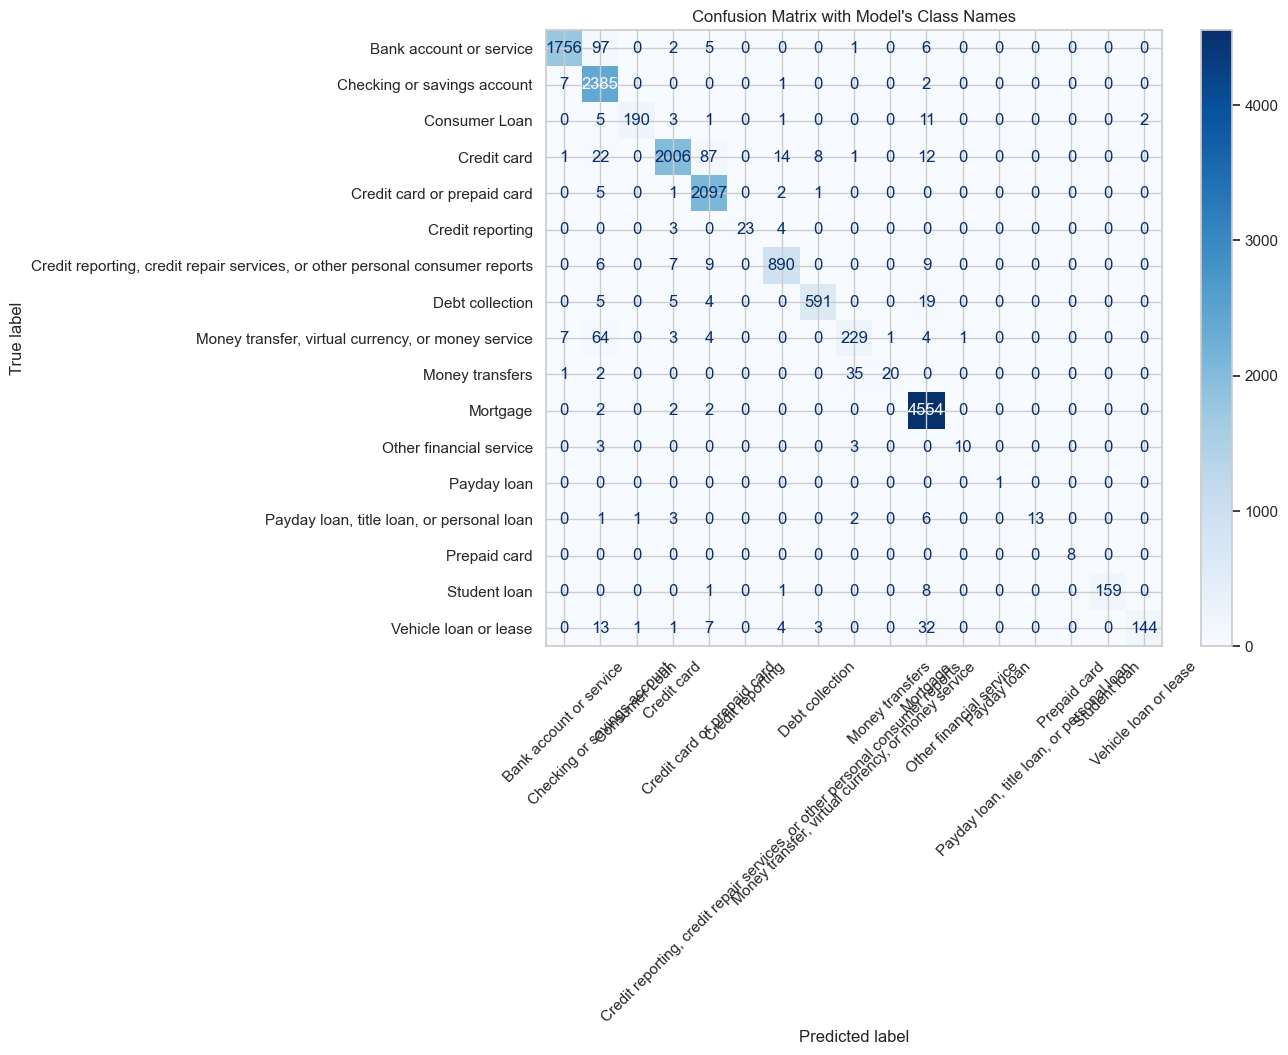

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = model.classes_

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', ax=ax) 

# Rotate x-axis labels
plt.xticks(rotation=45) 

plt.title("Confusion Matrix with Model's Class Names")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=model.classes_))


Model Evaluation Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Detailed Classification Report:
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.99      0.94      0.97      1867
                                                 Checking or savings account       0.91      1.00      0.95      2395
                                                               Consumer Loan       0.99      0.89      0.94       213
                                                                 Credit card       0.99      0.93      0.96      2151
                                                 Credit card or prepaid card       0.95      1.00      0.97      2106
                                                            Credit reporting       1.00      0.77      0.87        30
Credit reporting, credit repair services, or other pers

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Aditya
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aditya
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [self.pre_process(text) for text in X]
    
    def pre_process(self, text):
        tokens = word_tokenize(text)
        
        filtered_tokens = [word for word in tokens if word.lower() not in self.stop_words and word not in string.punctuation]
        
        stemmed_tokens = [self.stemmer.stem(word) for word in filtered_tokens]
        
        return ' '.join(stemmed_tokens).lower()

pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', tfidf_vectorizer),  
    ('classifier', model)  
])


new_inputs = ["but new clothes"]
predictions = pipeline.predict(new_inputs)

print(predictions)


['Credit card']


In [ ]:
import joblib

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')



['tfidf_vectorizer.joblib']

In [47]:
joblib.dump(pipeline, 'pipeline.joblib')


['pipeline.joblib']

In [ ]:
import json

config = {
    "vectorizer": {
        "ngram_range": (1, 2),
        "max_features": 10000
    },
    "model": {
        "C": 1.0,
        "kernel": "linear"
    }
}

with open('config.json', 'w') as f:
    json.dump(config, f)


In [49]:
class_names = model.classes_
joblib.dump(class_names, 'class_names.joblib')


['class_names.joblib']